In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Loading the data 

In [2]:
data = pd.read_csv('/Users/anandramesh/Desktop/Neural networks/Assignment 1/cars.csv')

### Data Visualization

In [3]:
data.describe()

,Age,Gender,Averagemiles,Debt,Income,Sales
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


In [4]:
data.shape

(963, 6)

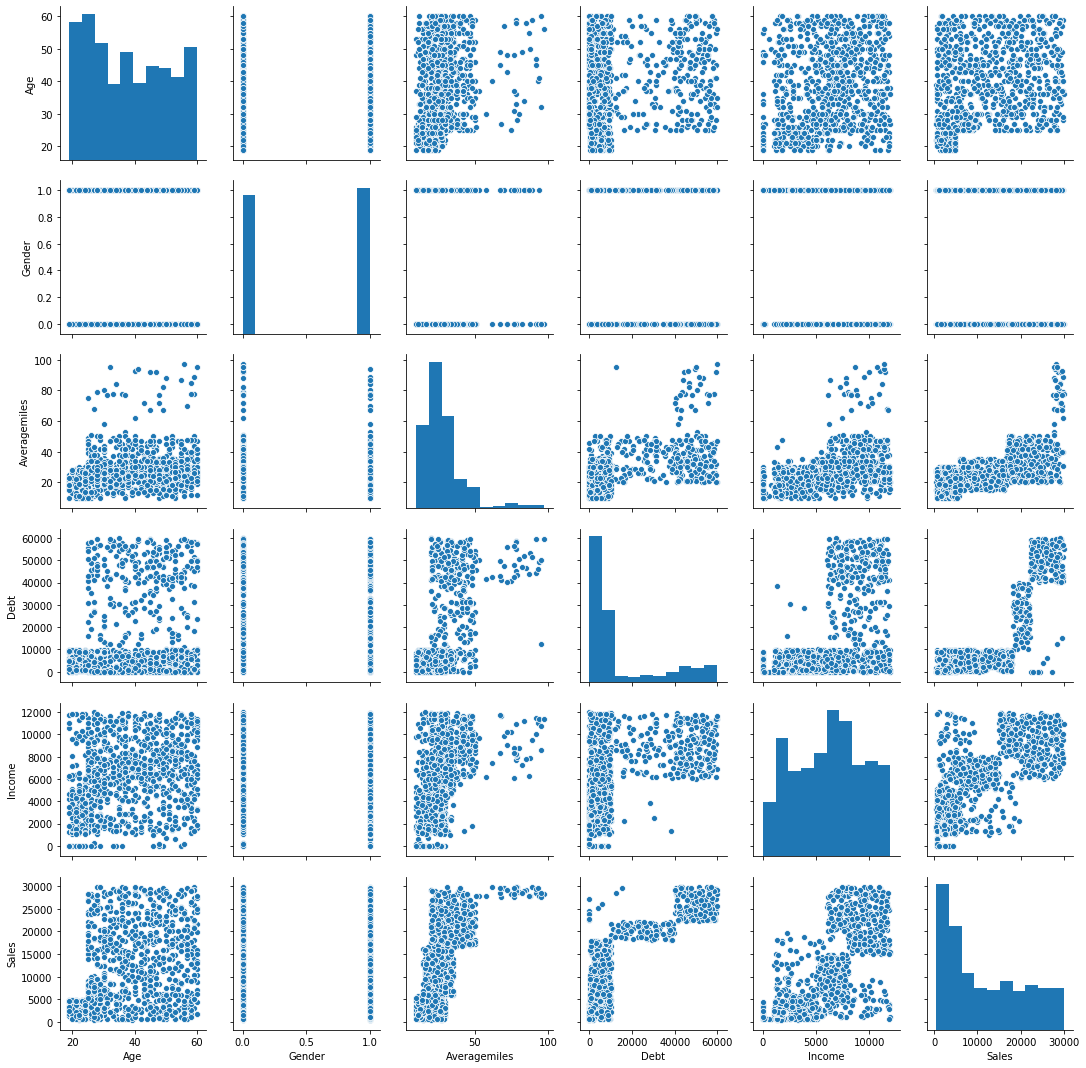

In [5]:
sns.pairplot(data)

### X and Y seperation 

In [6]:
x = data.drop('Sales',axis=1)
y = data['Sales']
a=y.to_numpy()
y=np.reshape(a, (-1,1))
print(y)

[[  620]
 [ 1792]
 [27754]
 [28256]
 [ 4438]
 [ 2102]
 [ 8520]
 [  500]
 [22997]
 [26517]
 [14112]
 [20956]
 [ 7650]
 [ 3197]
 [ 4531]
 [18005]
 [22854]
 [10278]
 [  739]
 [ 4271]
 [ 4733]
 [  971]
 [ 6263]
 [24677]
 [22830]
 [ 9913]
 [ 3598]
 [ 5222]
 [22450]
 [24993]
 [28607]
 [16875]
 [ 3199]
 [25394]
 [11562]
 [ 4376]
 [11530]
 [  780]
 [ 2945]
 [ 7601]
 [15044]
 [ 2073]
 [ 2869]
 [ 1492]
 [ 5927]
 [ 3454]
 [ 2282]
 [17374]
 [20341]
 [ 7062]
 [27677]
 [12581]
 [10780]
 [15288]
 [ 3928]
 [ 3852]
 [18819]
 [ 1447]
 [15573]
 [25996]
 [14202]
 [24097]
 [21708]
 [14074]
 [21608]
 [ 3453]
 [ 6376]
 [20247]
 [22842]
 [ 5018]
 [  648]
 [ 2454]
 [27800]
 [ 2531]
 [ 1205]
 [16653]
 [28822]
 [24291]
 [12748]
 [15905]
 [ 5489]
 [26152]
 [ 4785]
 [ 6465]
 [ 6200]
 [ 4923]
 [29715]
 [20532]
 [23645]
 [22508]
 [24130]
 [ 1432]
 [27213]
 [ 7388]
 [ 5580]
 [24161]
 [24583]
 [ 7274]
 [ 3978]
 [ 8082]
 [27667]
 [18965]
 [23883]
 [ 1206]
 [19606]
 [19634]
 [ 4298]
 [ 9851]
 [27777]
 [ 3310]
 [ 2228]
 

### Scaling of the data 

In [7]:
scaler = MinMaxScaler()
scaler.fit(x)
scaler.fit(y)
scaledx=scaler.transform(x)
scaledy=scaler.transform(y)

### Splitting of test and train data 

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(scaledx,scaledy,test_size=0.20,random_state=0)

In [23]:
xtrain.shape

(770, 5)

In [9]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(scaledx,scaledy,test_size=0.40,random_state=0)

In [25]:
xtrain1.shape

(577, 5)

### Model building 

In [10]:
model = Sequential()
model.add(Dense(25, input_dim=5, activation='linear'))
model.add(Dense(15, activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss = 'mse',metrics=["mean_absolute_error","mean_squared_error"])
scores = model.evaluate(xtest,ytest)
a1=model.fit(xtrain, ytrain, epochs=150 ,validation_split=0.2, shuffle=True)

193/193 [==============================] - 0s 235us/step
Train on 616 samples, validate on 154 samples
Epoch 1/150
616/616 [==============================] - 0s 272us/step - loss: 0.8267 - mean_absolute_error: 0.6724 - mean_squared_error: 0.8267 - val_loss: 0.2277 - val_mean_absolute_error: 0.3508 - val_mean_squared_error: 0.2277
Epoch 2/150
616/616 [==============================] - 0s 57us/step - loss: 0.1118 - mean_absolute_error: 0.2599 - mean_squared_error: 0.1118 - val_loss: 0.0516 - val_mean_absolute_error: 0.1924 - val_mean_squared_error: 0.0516
Epoch 3/150
616/616 [==============================] - 0s 49us/step - loss: 0.0531 - mean_absolute_error: 0.1929 - mean_squared_error: 0.0531 - val_loss: 0.0528 - val_mean_absolute_error: 0.1968 - val_mean_squared_error: 0.0528
Epoch 4/150
616/616 [==============================] - 0s 49us/step - loss: 0.0466 - mean_absolute_error: 0.1771 - mean_squared_error: 0.0466 - val_loss: 0.0429 - val_mean_absolute_error: 0.1741 - val_mean_square

In [11]:
model = Sequential()
model.add(Dense(25, input_dim=5, activation='linear'))
model.add(Dense(15, activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss = 'mse',metrics=["mean_absolute_error","mean_squared_error"])
scores = model.evaluate(xtest1,ytest1)
b1=model.fit(xtrain1, ytrain1, epochs=150 ,validation_split=0.2, shuffle=True)

386/386 [==============================] - 0s 101us/step
Train on 461 samples, validate on 116 samples
Epoch 1/150
461/461 [==============================] - 0s 370us/step - loss: 0.0605 - mean_absolute_error: 0.1836 - mean_squared_error: 0.0605 - val_loss: 0.0238 - val_mean_absolute_error: 0.1119 - val_mean_squared_error: 0.0238
Epoch 2/150
461/461 [==============================] - 0s 54us/step - loss: 0.0260 - mean_absolute_error: 0.1204 - mean_squared_error: 0.0260 - val_loss: 0.0193 - val_mean_absolute_error: 0.1202 - val_mean_squared_error: 0.0193
Epoch 3/150
461/461 [==============================] - 0s 52us/step - loss: 0.0230 - mean_absolute_error: 0.1263 - mean_squared_error: 0.0230 - val_loss: 0.0187 - val_mean_absolute_error: 0.1184 - val_mean_squared_error: 0.0187
Epoch 4/150
461/461 [==============================] - 0s 52us/step - loss: 0.0217 - mean_absolute_error: 0.1212 - mean_squared_error: 0.0217 - val_loss: 0.0180 - val_mean_absolute_error: 0.1144 - val_mean_square

### Plotting the graph 

In [12]:
print(a1.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])


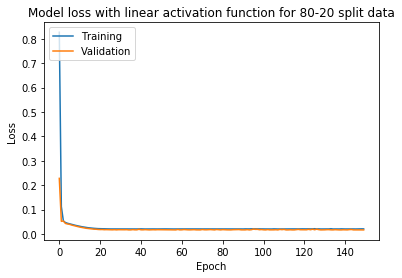

In [17]:
import matplotlib.pyplot as plt
plt.plot(a1.history['loss'])
plt.plot(a1.history['val_loss'])
plt.title('Model loss with linear activation function for 80-20 split data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

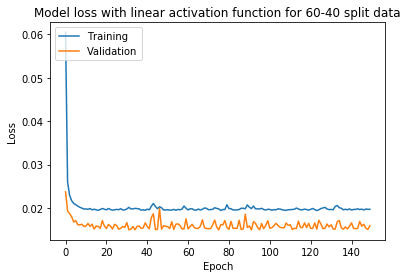

In [18]:
plt.plot(b1.history['loss'])
plt.plot(b1.history['val_loss'])
plt.title('Model loss with linear activation function for 60-40 split data')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

### Conclusion

1. The model was built with different activation functions such as linear, relu and sigmoid. We found that the linear perfomed better compared to other models.
2. Apart from this, We were able also find that when the data was split 80/20 percent for test and train data, the loss was less when compared to the 60/40 percent data. This is because training data was more. There was so much fluctuation when the split was 60/40.
3. The number of epochs were given as 150 for both scenarios. It was also found that as the iterations increase, the loss also reduces.
4. Additionally, when Elu was also tried as activation function it performed better than linear activation function itself.